In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv


Epoch 1/50
3032/3032 [==============================] - 52s 16ms/step - loss: 0.0017
Epoch 2/50
3032/3032 [==============================] - 50s 17ms/step - loss: 7.5251e-04
Epoch 3/50
3032/3032 [==============================] - 50s 17ms/step - loss: 6.1054e-04
Epoch 4/50
3032/3032 [==============================] - 50s 17ms/step - loss: 5.2933e-04
Epoch 5/50
3032/3032 [==============================] - 50s 17ms/step - loss: 4.9618e-04
Epoch 6/50
3032/3032 [==============================] - 50s 16ms/step - loss: 4.6875e-04
Epoch 7/50
3032/3032 [==============================] - 50s 17ms/step - loss: 4.3729e-04
Epoch 8/50
3032/3032 [==============================] - 50s 16ms/step - loss: 4.1420e-04
Epoch 9/50
3032/3032 [==============================] - 50s 16ms/step - loss: 3.9856e-04
Epoch 10/50
3032/3032 [==============================] - 50s 16ms/step - loss: 3.8362e-04
Epoch 11/50
3032/3032 [==============================] - 50s 16ms/step - loss: 3.6965e-04
Epoch 12/50
3032/3032 [

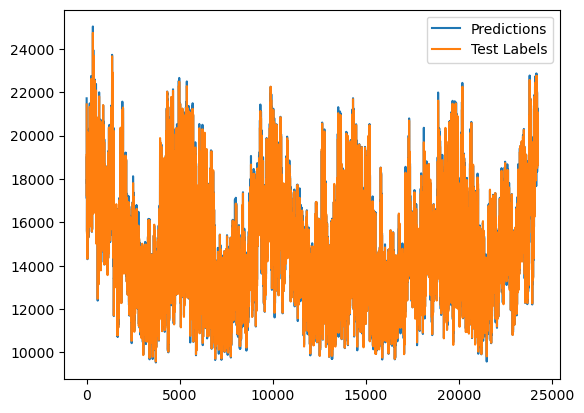

Seperate graphs for predictions and test data: 


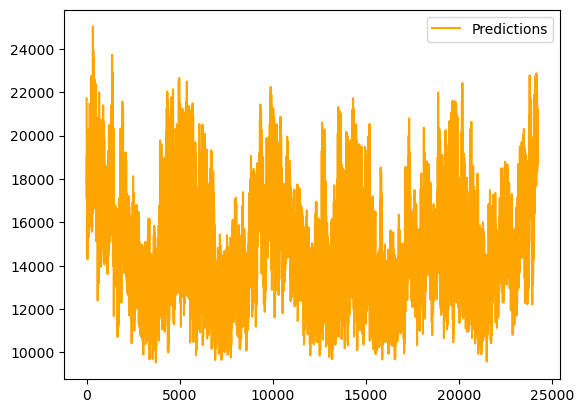

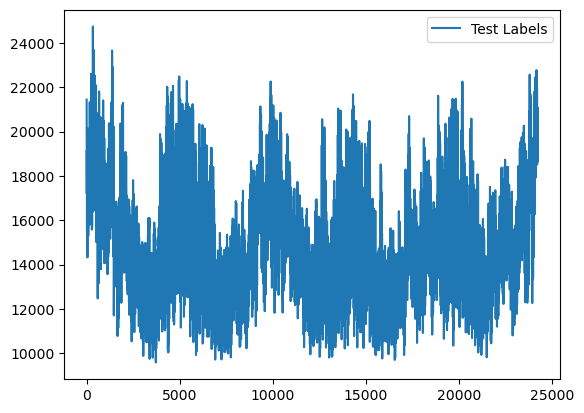

Accuracy: 0.9904153944016899


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/kaggle/input/hourly-energy-consumption/AEP_hourly.csv', parse_dates=['Datetime'], index_col='Datetime')

# Preprocess data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split data into training and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Define window size for input sequence
window_size = 24

# Create input sequences and labels for training set
train_X = []
train_y = []
for i in range(window_size, len(train_data)):
    train_X.append(train_data[i-window_size:i, :])
    train_y.append(train_data[i, 0])
train_X = np.array(train_X)
train_y = np.array(train_y)

# Define and compile GRU model
model = Sequential()
model.add(GRU(units=64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(train_X, train_y, epochs=50, batch_size=32)

# Create input sequences and labels for test set
test_X = []
test_y = []
for i in range(window_size, len(test_data)):
    test_X.append(test_data[i-window_size:i, :])
    test_y.append(test_data[i, 0])
test_X = np.array(test_X)
test_y = np.array(test_y)

# Make predictions on test set
predictions = model.predict(test_X)

# Inverse scale the predictions and test labels
predictions = scaler.inverse_transform(predictions)
test_y = scaler.inverse_transform(test_y.reshape(-1, 1))

# Plot predictions and test labels
plt.plot(predictions, label='Predictions')
plt.plot(test_y, label='Test Labels')
plt.legend()
plt.show()

# ****************************For a clear output************************************
print("Seperate graphs for predictions and test data: ")
# Plot predictions
plt.plot(predictions, label='Predictions',color='orange')
#plt.plot(test_y, label='Test Labels')
plt.legend()
plt.show()
#plot test
plt.plot(test_y, label='Test Labels')
plt.legend()
plt.show()

# Evaluating the model's accuracy
accuracy = r2_score(test_y, predictions)

# Printing the accuracy score 
print('Accuracy:', accuracy)


In [6]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error 
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Accuracy percentage: ", accuracy*100)
print('Mean Squared Error: ', mean_squared_error(test_y, predictions))
print('Mean Absolute Error: ', mean_absolute_error(test_y, predictions))
print('Mean Absolute Percentage error: ',mean_absolute_percentage_error(y_true=test_y, y_pred=predictions))

Accuracy percentage:  99.04153944016899
Mean Squared Error:  63152.66620626458
Mean Absolute Error:  145.33749497834643
Mean Absolute Percentage error:  0.9968885123799562
